In [1]:
import sys
sys.path.append('..')
import os

from utils.constants import *
from utils.file_readers import *
from utils.data_exploration import *
from utils.signal_processing import *
from utils.sliding_window import *
from utils.stand_norm import *
from utils.one_vs_all_training import *
from utils.experiment_utils import *

import matplotlib.patches as mpatches

Using TensorFlow backend.


In [2]:
data = read_all_files()

100%|██████████| 306/306 [00:22<00:00, 13.71it/s]


In [3]:
get_subject_names()

['adela',
 'aggie',
 'andrius',
 'diana',
 'jack',
 'joao',
 'lukasz',
 'nikita',
 'rim',
 'ron',
 'santi',
 'seb',
 'sharan',
 'teo',
 'zoe']

In [4]:
data

,timestamp,seq,accel_x,accel_y,accel_z,accel_magnitude,accel_pca,accel_x_smooth,accel_x_lp,accel_x_hp,...,accel_magnitude_grad,accel_magnitude_doublegrad,accel_pca_smooth,accel_pca_lp,accel_pca_hp,accel_pca_grad,accel_pca_doublegrad,subject,activity,correctness
0,1575566873410,0,-0.041016,-0.967773,0.093750,0.973168,0.014811,-0.012500,-0.013434,0.019851,...,0.075748,-0.073780,-0.096984,-0.024529,-0.013896,-0.057875,0.024788,ron,6,correct
1,1575566873411,2,-0.044922,-1.047852,0.014648,1.048916,-0.043064,-0.012500,-0.012537,0.010087,...,0.001967,-0.046308,-0.101734,-0.040741,-0.056134,-0.033087,0.010833,ron,6,correct
2,1575566873412,4,-0.027344,-0.976562,0.017578,0.977103,-0.051363,-0.013086,-0.010840,0.022161,...,-0.016869,0.011496,-0.105719,-0.058462,-0.049800,-0.036210,0.004900,ron,6,correct
3,1575566873412,6,0.016602,-1.014648,-0.028320,1.015179,-0.115484,-0.009961,-0.008913,0.061264,...,0.024960,0.003431,-0.109515,-0.076146,-0.100753,-0.023286,0.028667,ron,6,correct
4,1575566873413,8,-0.015625,-1.026367,-0.033203,1.027023,-0.097935,-0.009766,-0.007282,0.025163,...,-0.010007,-0.014505,-0.108101,-0.092176,-0.071879,0.021125,-0.004218,ron,6,correct
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126462,1574270078523,1140,-0.039062,-0.991211,0.018555,0.992154,0.255054,-0.039062,-0.010991,-0.055773,...,-0.016941,-0.034176,0.255054,0.195739,0.064810,-0.010373,-0.054421,andrius,7,incorrect
126463,1574270078524,1142,-0.059570,-0.852539,0.073242,0.857750,0.207447,-0.059570,-0.000619,-0.084235,...,-0.028918,0.025183,0.207447,0.176806,0.020636,-0.055745,-0.008768,andrius,7,incorrect
126464,1574270078525,1144,0.044922,-0.928711,0.091797,0.934317,0.143565,0.044922,0.007788,0.011086,...,0.033425,0.010353,0.143565,0.153498,-0.039433,-0.027908,0.032274,andrius,7,incorrect
126465,1574270078525,1146,0.051758,-0.919922,0.077148,0.924601,0.151630,0.051758,0.013652,0.008444,...,-0.008211,-0.020066,0.151630,0.126447,-0.028046,0.008802,0.018724,andrius,7,incorrect


In [5]:
import datetime

In [6]:
print(str(datetime.timedelta(seconds=717.2)).split(':')[1])
print(str(datetime.timedelta(seconds=717.2)).split(':')[2])

11
57.200000


In [11]:
total = 0
total_std = []
for subject in get_subject_names():
    print('*' * 80)
    print(subject)
    print("*" * 80)
    mask = data['subject'] == subject
    sub_data = data[mask]
    print("Length of all recordings = {} datapoints".format(len(sub_data)))
    print("In seconds (/12.5) = {}s".format(len(sub_data)/12.5))
    total += len(sub_data)/12.5
    minutes = str(datetime.timedelta(seconds=len(sub_data)/12.5)).split(":")[1]
    seconds = str(datetime.timedelta(seconds=len(sub_data)/12.5)).split(":")[2]
    print("In minutes + seconds = {}m {}s".format(minutes, seconds))
    total_std.append(len(sub_data)/12.5)

print("Total: ")
print(total_std)
total /= len(get_subject_names())
print("Average time in s = {}".format(total))
avg_minutes = str(datetime.timedelta(seconds=total)).split(":")[1]
avg_seconds = str(datetime.timedelta(seconds=total)).split(":")[2]
print("In minutes + seconds = {}m {}s".format(avg_minutes, avg_seconds))
print("Std time = {}".format(np.std(total_std)))
std_minutes = str(datetime.timedelta(seconds=np.std(total_std))).split(":")[1]
std_seconds = str(datetime.timedelta(seconds=np.std(total_std))).split(":")[2]
print("Std in mins and secs = {}m {}s".format(std_minutes, std_seconds))

********************************************************************************
adela
********************************************************************************
Length of all recordings = 8965 datapoints
In seconds (/12.5) = 717.2s
In minutes + seconds = 11m 57.200000s
********************************************************************************
aggie
********************************************************************************
Length of all recordings = 8445 datapoints
In seconds (/12.5) = 675.6s
In minutes + seconds = 11m 15.600000s
********************************************************************************
andrius
********************************************************************************
Length of all recordings = 9850 datapoints
In seconds (/12.5) = 788.0s
In minutes + seconds = 13m 08s
********************************************************************************
diana
********************************************************************************
Length

In [12]:
ages = [21, 25, 27, 25, 22, 24, 24, 23, 23, 25, 23, 23, 22, 22, 21]
print(np.mean(ages))
print(np.std(ages))

23.333333333333332
1.6193277068654823


In [13]:
total = {'correct':0, 'incorrect':0}
totals_std = {'correct':[], 'incorrect':[]}

for correctness in ['correct', 'incorrect']:
    print('*' * 80)
    print(correctness)
    print("*" * 80)
    for subject in get_subject_names():
        print('*' * 80)
        print(subject)
        print("*" * 80)
        og_mask = data['subject'] == subject
        og_sub_data = data[og_mask]
        og_minutes = str(datetime.timedelta(seconds=len(og_sub_data)/12.5)).split(":")[1]
        og_seconds = str(datetime.timedelta(seconds=len(og_sub_data)/12.5)).split(":")[2]
        print("OG LENGTH = {}m {}s".format(og_minutes, og_seconds))
        mask = (data['subject'] == subject) & (data['correctness'] == correctness)
        sub_data = data[mask]
        print("Length of all recordings = {} datapoints".format(len(sub_data)))
        print("In seconds (/12.5) = {}s".format(len(sub_data)/12.5))
        total[correctness] += len(sub_data)/12.5
        minutes = str(datetime.timedelta(seconds=len(sub_data)/12.5)).split(":")[1]
        seconds = str(datetime.timedelta(seconds=len(sub_data)/12.5)).split(":")[2]
        print("In minutes + seconds = {}m {}s".format(minutes, seconds))
        
        totals_std[correctness].append(len(sub_data)/12.5)

total_correct = total['correct']/len(get_subject_names())
total_incorrect = total['incorrect']/len(get_subject_names())
print('*' * 80)
print('CORRECT')
print("*" * 80)
print("Average time in s = {}".format(total_correct))
avg_minutes = str(datetime.timedelta(seconds=total_correct)).split(":")[1]
avg_seconds = str(datetime.timedelta(seconds=total_correct)).split(":")[2]
print("In minutes + seconds = {}m {}s".format(avg_minutes, avg_seconds))
print("STD time in s = {}".format(np.std(totals_std['correct'])))
std_minutes = str(datetime.timedelta(seconds=np.std(totals_std['correct']))).split(":")[1]
std_seconds = str(datetime.timedelta(seconds=np.std(totals_std['correct']))).split(":")[2]
print("STD in minutes + seconds = {}m {}s".format(std_minutes, std_seconds))

print('*' * 80)
print('INCORRECT')
print("*" * 80)
print("Average time in s = {}".format(total_incorrect))
avg_minutes = str(datetime.timedelta(seconds=total_incorrect)).split(":")[1]
avg_seconds = str(datetime.timedelta(seconds=total_incorrect)).split(":")[2]
print("In minutes + seconds = {}m {}s".format(avg_minutes, avg_seconds))
print("STD time in s = {}".format(np.std(totals_std['incorrect'])))
std_minutes = str(datetime.timedelta(seconds=np.std(totals_std['incorrect']))).split(":")[1]
std_seconds = str(datetime.timedelta(seconds=np.std(totals_std['incorrect']))).split(":")[2]
print("STD in minutes + seconds = {}m {}s".format(std_minutes, std_seconds))

********************************************************************************
correct
********************************************************************************
********************************************************************************
adela
********************************************************************************
OG LENGTH = 11m 57.200000s
Length of all recordings = 3230 datapoints
In seconds (/12.5) = 258.4s
In minutes + seconds = 04m 18.400000s
********************************************************************************
aggie
********************************************************************************
OG LENGTH = 11m 15.600000s
Length of all recordings = 2530 datapoints
In seconds (/12.5) = 202.4s
In minutes + seconds = 03m 22.400000s
********************************************************************************
andrius
********************************************************************************
OG LENGTH = 13m 08s
Length of all recordings = 3200 

## Time by activity, averaged for all subjects

In [37]:
activity_names = get_activity_label_dict()

In [40]:
total_subjects = len(get_subject_names())

In [51]:
total = 0
# totals_correct = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}
# totals_incorrect = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}
total_correct = 0
total_incorrect = 0

for activity in range(10):
    print('*' * 80)
    print(activity_names[activity])
    print("*" * 80)
    for correctness in ['correct', 'incorrect']:
        print('*' * 80)
        print(correctness)
        print("*" * 80)
        mask = (data['activity'] == activity) & (data['correctness'] == correctness)
        sub_data = data[mask]
        print("Length of all recordings = {} datapoints".format(len(sub_data)))
        print("In seconds (/12.5) = {}s".format(len(sub_data)/12.5))
        total += len(sub_data)/12.5
        minutes = str(datetime.timedelta(seconds=len(sub_data)/12.5/total_subjects)).split(":")[1]
        seconds = str(datetime.timedelta(seconds=len(sub_data)/12.5/total_subjects)).split(":")[2]
        
        if correctness == 'correct':
            total_correct += len(sub_data)/12.5/total_subjects
        else:
            total_incorrect += len(sub_data)/12.5/total_subjects
            
        print("In minutes + seconds = {}m {}s".format(minutes, seconds))

total /= len(get_activity_name_dict())
print("Average time in s = {}".format(total))
avg_minutes = str(datetime.timedelta(seconds=total)).split(":")[1]
avg_seconds = str(datetime.timedelta(seconds=total)).split(":")[2]
print("In minutes + seconds = {}m {}s".format(avg_minutes, avg_seconds))

print("Totals correct:")
# for k, v in totals_correct.items():
#     totals_correct[k] = v/10
print(total_correct)

print("Totals incorrect:")
print(total_incorrect)

********************************************************************************
Sit to stand
********************************************************************************
********************************************************************************
correct
********************************************************************************
Length of all recordings = 7675 datapoints
In seconds (/12.5) = 614.0s
In minutes + seconds = 00m 40.933333s
********************************************************************************
incorrect
********************************************************************************
Length of all recordings = 11670 datapoints
In seconds (/12.5) = 933.6s
In minutes + seconds = 01m 02.240000s
********************************************************************************
Knee extension
********************************************************************************
********************************************************************************
correc

TypeError: can only concatenate str (not "int") to str

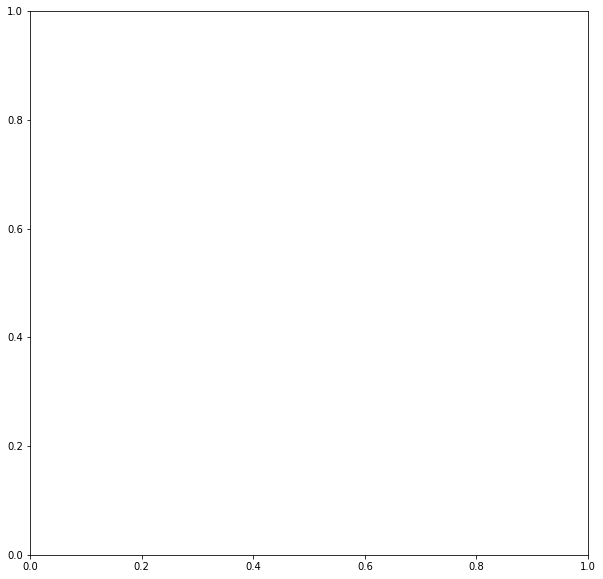

In [56]:
activity = 0
correctness= 'correct'
mask = (data['activity'] == activity) & (data['correctness'] == correctness)

fig = plt.figure(figsize=(10,10))
plt.boxplot(data[mask].groupby('subject'))

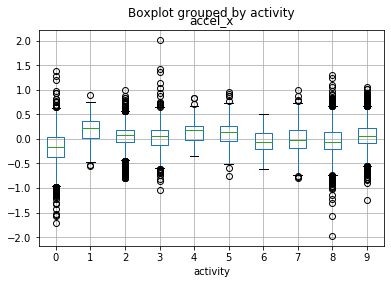

In [66]:
data.boxplot(column='accel_x', by='activity')

# Should make new dataframe with durations

In [68]:
durations = pd.DataFrame(columns=['subject', 'activity', 'correctness', 'time'])

In [72]:
for subject in get_subject_names():
    for activity in range(10):
        for correctness in ['correct', 'incorrect']:
            mask = (data['subject'] == subject) & (data['activity'] == activity) & (data['correctness'] == correctness)
            sub_data = data[mask]
            time = len(sub_data)/12.5
            
            durations = durations.append({'subject': subject, 'activity':activity, 'correctness':correctness, 'time':time}, ignore_index=True)

In [73]:
durations

,subject,activity,correctness,time
0,adela,0,correct,39.6
1,adela,0,incorrect,68.8
2,adela,1,correct,24.4
3,adela,1,incorrect,48.8
4,adela,2,correct,18.0
...,...,...,...,...
295,zoe,7,incorrect,22.8
296,zoe,8,correct,30.8
297,zoe,8,incorrect,34.4
298,zoe,9,correct,13.6


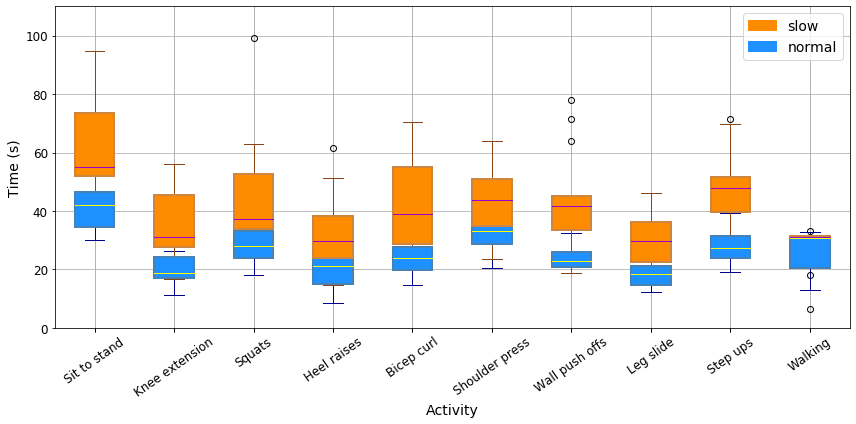

In [175]:
durations_correct = durations[durations['correctness'] == 'correct']
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1,1,1)
bp1 = durations_correct.boxplot(column=['time'], by=['activity'], ax=ax, notch=False, patch_artist=True,
                         return_type='both')

[item.set_linewidth(2) for item in bp1['time'][1]['boxes']]
[item.set_color('steelblue') for item in bp1['time'][1]['boxes']]
[item.set_color('yellow') for item in bp1['time'][1]['medians']]
[item.set_color('darkblue') for item in bp1['time'][1]['caps']]
[item.set_color('darkblue') for item in bp1['time'][1]['whiskers']]

for row_key, (ax,row) in bp1.iteritems():
    for i, box in enumerate(row['boxes']):
        box.set_facecolor('dodgerblue')

durations_incorrect = durations[durations['correctness'] == 'incorrect']
bp2 = durations_incorrect.boxplot(column=['time'], by=['activity'], ax=ax, notch=False, patch_artist=True,
                                 return_type='both')

[item.set_linewidth(2) for item in bp2['time'][1]['boxes']]
[item.set_color('peru') for item in bp2['time'][1]['boxes']]
[item.set_color('darkviolet') for item in bp2['time'][1]['medians']]
[item.set_color('saddlebrown') for item in bp2['time'][1]['caps']]
[item.set_color('saddlebrown') for item in bp2['time'][1]['whiskers']]

for row_key, (ax,row) in bp2.iteritems():
    for i, box in enumerate(row['boxes']):
        box.set_facecolor('darkorange')

ax.set_xlabel("Activity", fontsize=14)
ax.set_ylabel("Time (s)", fontsize=14)
ax.set_title("")
ax.set_ylim((0,110))

        
xticklabels = ['Sit to stand',
              'Knee extension',
              'Squats',
              'Heel raises',
              'Bicep curl',
              'Shoulder press',
              'Wall push offs',
              'Leg slide',
              'Step ups',
              'Walking']
ax.set_xticklabels(xticklabels, rotation=35, fontsize=12)
ax.set_yticklabels([0, 20, 40, 60, 80, 100], fontsize=12)
fig.suptitle("")

green_patch = mpatches.Patch(color='darkorange', label="slow")
yellow_patch = mpatches.Patch(color='dodgerblue', label='normal')
plt.legend(handles=[green_patch, yellow_patch], fontsize=14)

fig.tight_layout()
plt.savefig("./recorded_time_normal_slow.pdf")

## Data exploration - plot activities PCA 

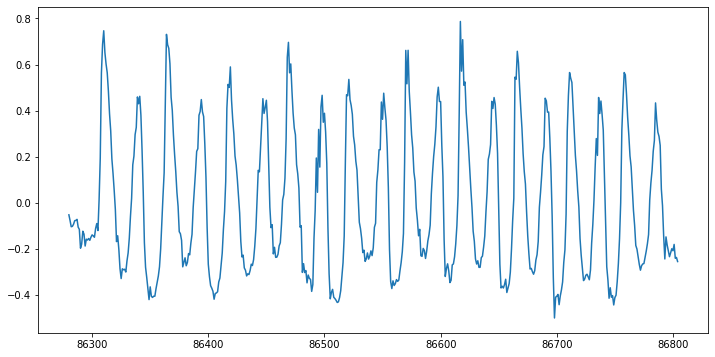

In [181]:
subject = 'teo'
activity = 0
correctness = 'correct'

mask = (data['subject'] == subject) & (data['activity'] == activity) & (data['correctness'] == correctness)

fig = plt.figure(figsize=(12, 6))
plt.plot(data[mask]['accel_pca'])

In [229]:
def plot_activities_comparison(subject, correctness, activities, ylim=(-0.6, 0.8)):

#     subject = 'teo'
#     correctness = 'correct'

    fig = plt.figure(figsize=(20,20))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    activity_names = get_activity_label_dict()

    for activity in activities:

        mask = (data['subject'] == subject) & (data['activity'] == activity) & (data['correctness'] == correctness)
        ax = fig.add_subplot(10,1,activity+1)
        ax.plot(data[mask]['accel_pca'])
        ax.set_title(activity_names[activity], fontsize=14)
        ax.set_ylim(ylim)
        labels = ax.get_yticks()
        ax.set_yticklabels(labels, fontsize=14)

        if activity == 2:
            ax.set_ylabel("Acceleration (g)", fontsize=16)

        if activity == 4:
            labels = ax.get_xticks()
            num_seconds = (labels[-1] - labels[0])/12.5
            labels = np.linspace(-4, num_seconds-4, len(labels))
            labels = [int(i) for i in labels]
            ax.set_xticklabels(labels, fontsize=14)
            ax.set_xlabel("Time (s)", fontsize=16)
        else:
            ax.set_xticks([])

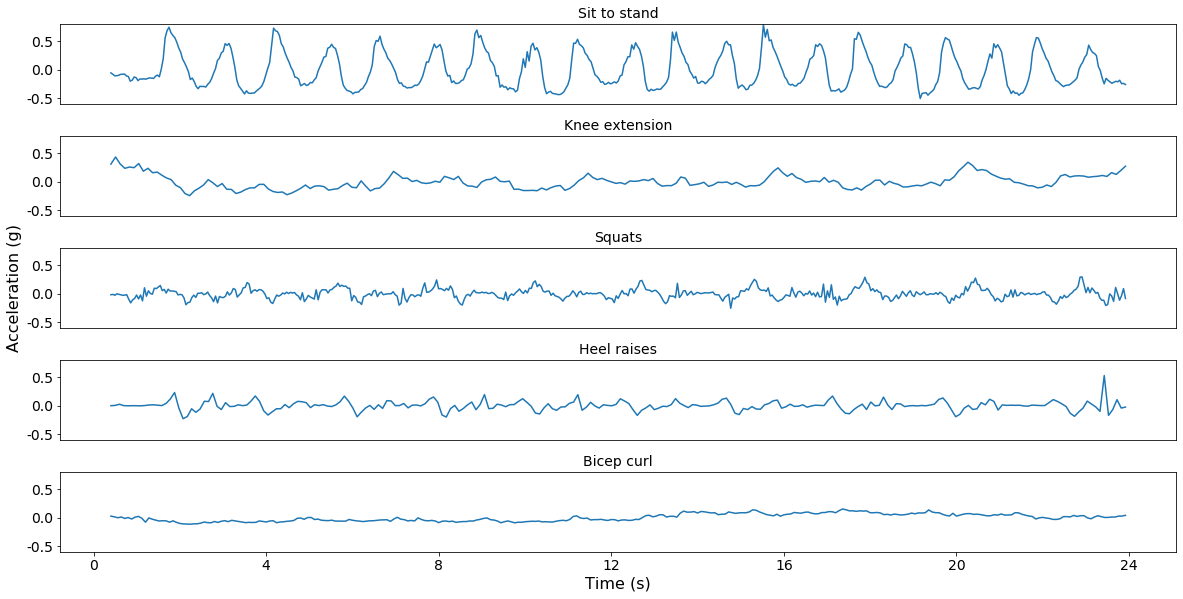

In [230]:
plot_activities_comparison(subject='teo', correctness='correct', activities=[0,1,2,3,4])

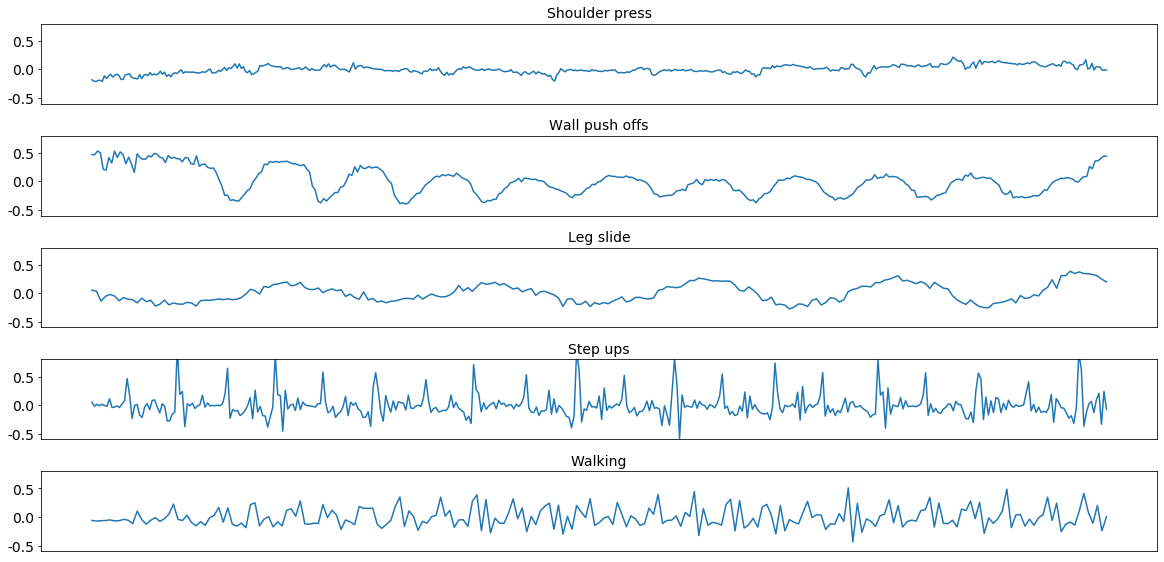

In [231]:
plot_activities_comparison(subject='teo', correctness='correct', activities=[5, 6, 7, 8, 9])

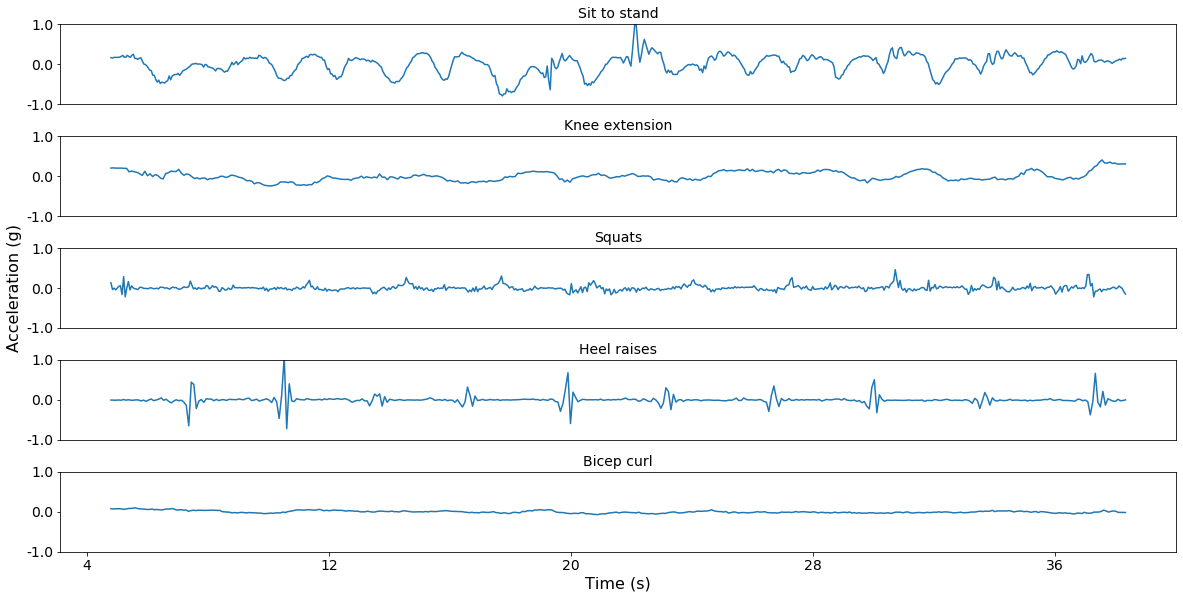

In [232]:
plot_activities_comparison(subject='teo', correctness='incorrect', activities=[0,1,2,3,4], ylim=(-1, 1))

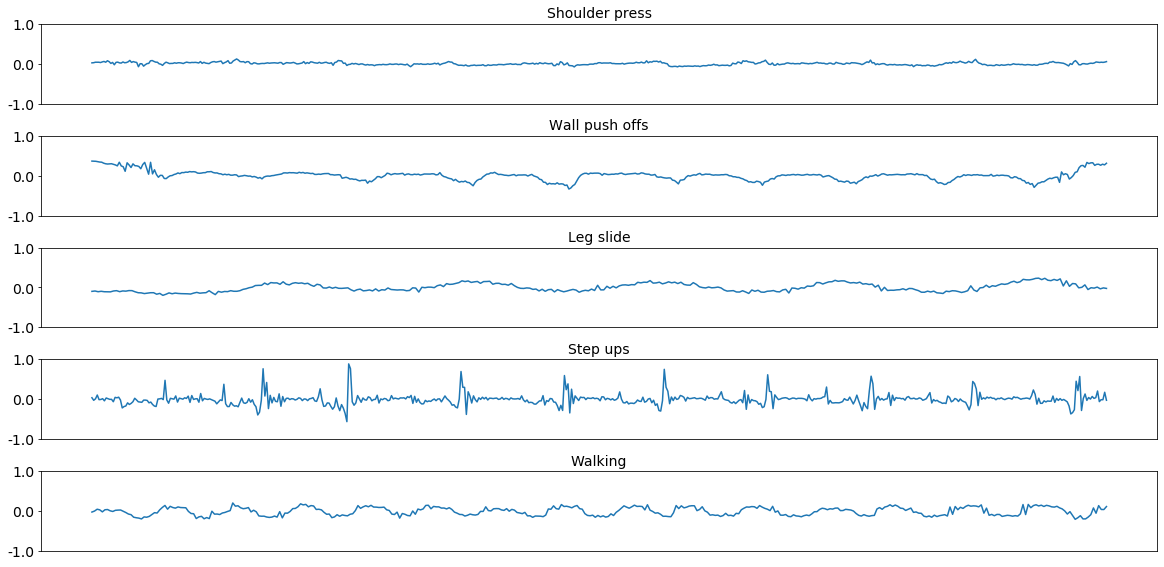

In [233]:
plot_activities_comparison(subject='teo', correctness='incorrect', activities=[5, 6, 7, 8, 9], ylim=(-1, 1))

In [317]:
def plot_activities_comparison_both(subject, activities, ylim=(-0.6, 0.8), save=True, title="",
                                   titlefontsize=24, labelfontsize=24, tickfontsize=20,
                                   hspace=0.4, wspace=0.4):

#     subject = 'teo'
#     correctness = 'correct'

    fig = plt.figure(figsize=(20,15))
    activity_names = get_activity_label_dict()
    
    curr_row = 1
    
    for activity in activities:
        
        correctness = 'correct'
        mask = (data['subject'] == subject) & (data['activity'] == activity) & (data['correctness'] == correctness)
        ax = fig.add_subplot(5,1,curr_row)
        ax.plot(data[mask]['seq'], data[mask]['accel_pca'], label="normal")
        
        correctness = 'incorrect'
        mask = (data['subject'] == subject) & (data['activity'] == activity) & (data['correctness'] == correctness)
        ax.plot(data[mask]['seq'], data[mask]['accel_pca'], label="slow")
        ax.set_title(activity_names[activity], fontsize=titlefontsize)
        ax.set_ylim(ylim)
        labels = ax.get_yticks()
        ax.set_yticklabels(labels, fontsize=tickfontsize)
        
        for n, label in enumerate(ax.yaxis.get_ticklabels()):
            if n%2 == 0:
                label.set_visible(False)
        
        if activity == 4 or activity == 9:
            ax.legend(fontsize=labelfontsize)

        if activity == 2 or activity == 7:
            ax.set_ylabel("Acceleration (g)", fontsize=labelfontsize)

        if activity == 4 or activity == 9:
            labels = ax.get_xticks()
            print(labels)
            num_seconds = ((labels[-1] - labels[0])/2)/12.5
            print(num_seconds)
            labels = np.linspace(0, num_seconds, len(labels)-1)
            labels = [0] + [int(i) for i in labels]
            print(labels)
            ax.set_xticklabels(labels, fontsize=tickfontsize)
            ax.set_xlabel("Time (s)", fontsize=labelfontsize)
        else:
            ax.set_xticks([])
        
        curr_row +=1
    
    fig.subplots_adjust(hspace=hspace, wspace=wspace)
        
    if save:
        fig.tight_layout()
        plt.savefig("../Plots/zz_report/{}.pdf".format(title))

[-200.    0.  200.  400.  600.  800. 1000.]
48.0
[0, 0, 9, 19, 28, 38, 48]


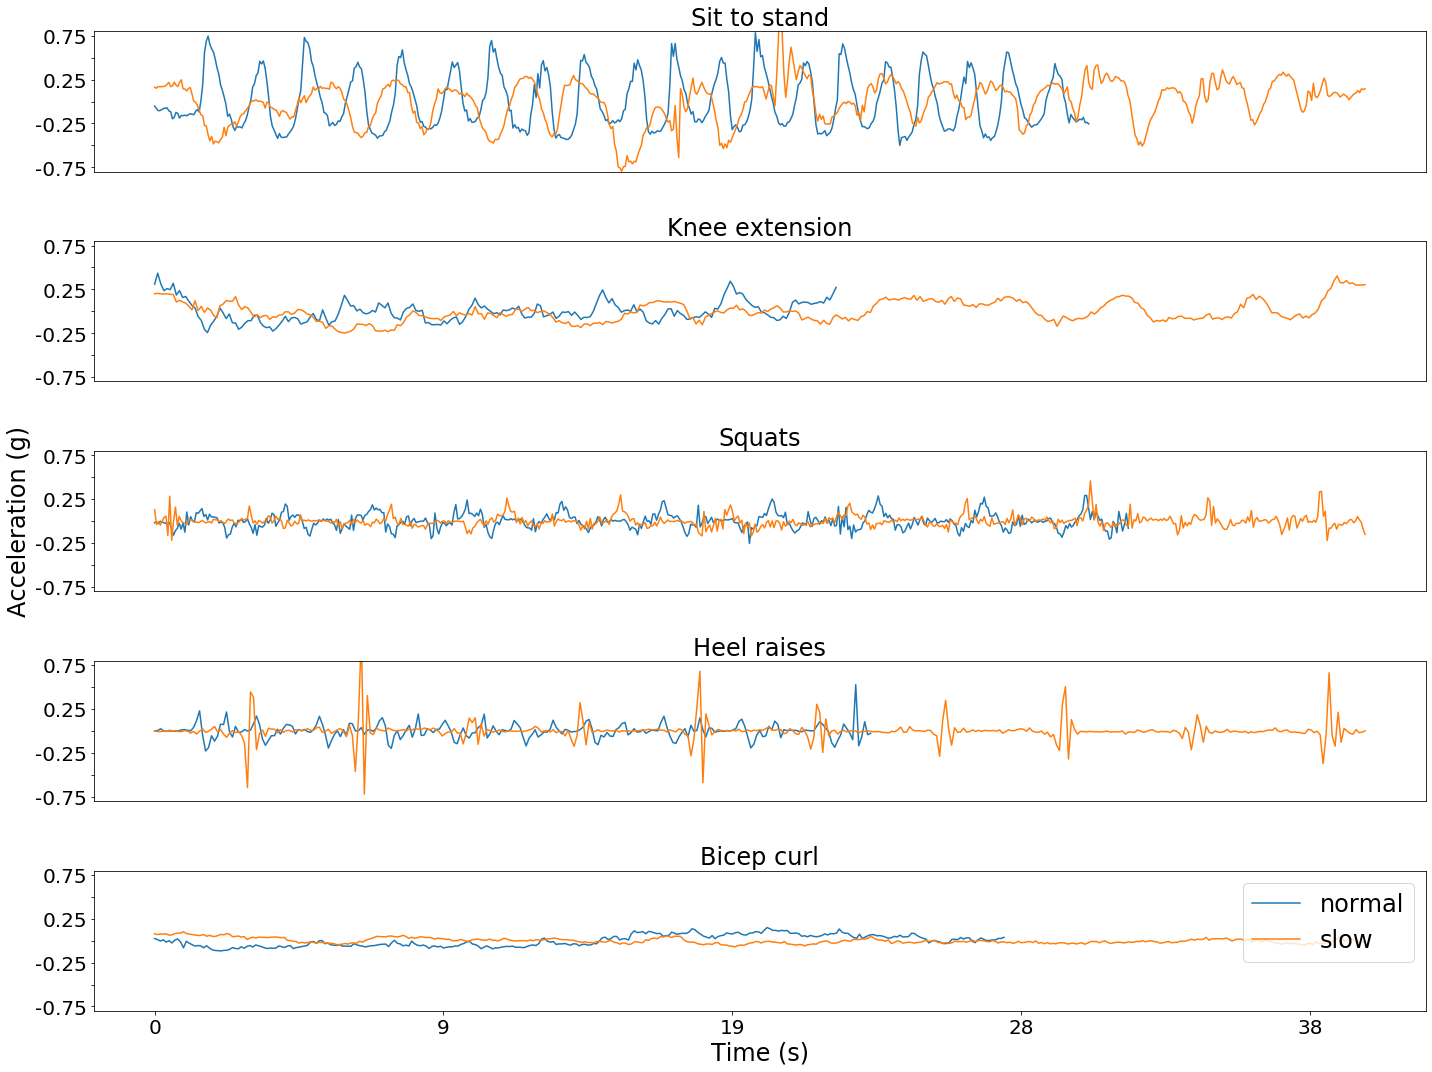

In [318]:
plot_activities_comparison_both(subject='teo', activities=[0,1,2,3,4], ylim=(-0.8,0.8), save=True, title='first_5',
                               hspace=0.4, wspace=0)

[-100.    0.  100.  200.  300.  400.  500.  600.  700.  800.  900.]
40.0
[0, 0, 4, 8, 13, 17, 22, 26, 31, 35, 40]


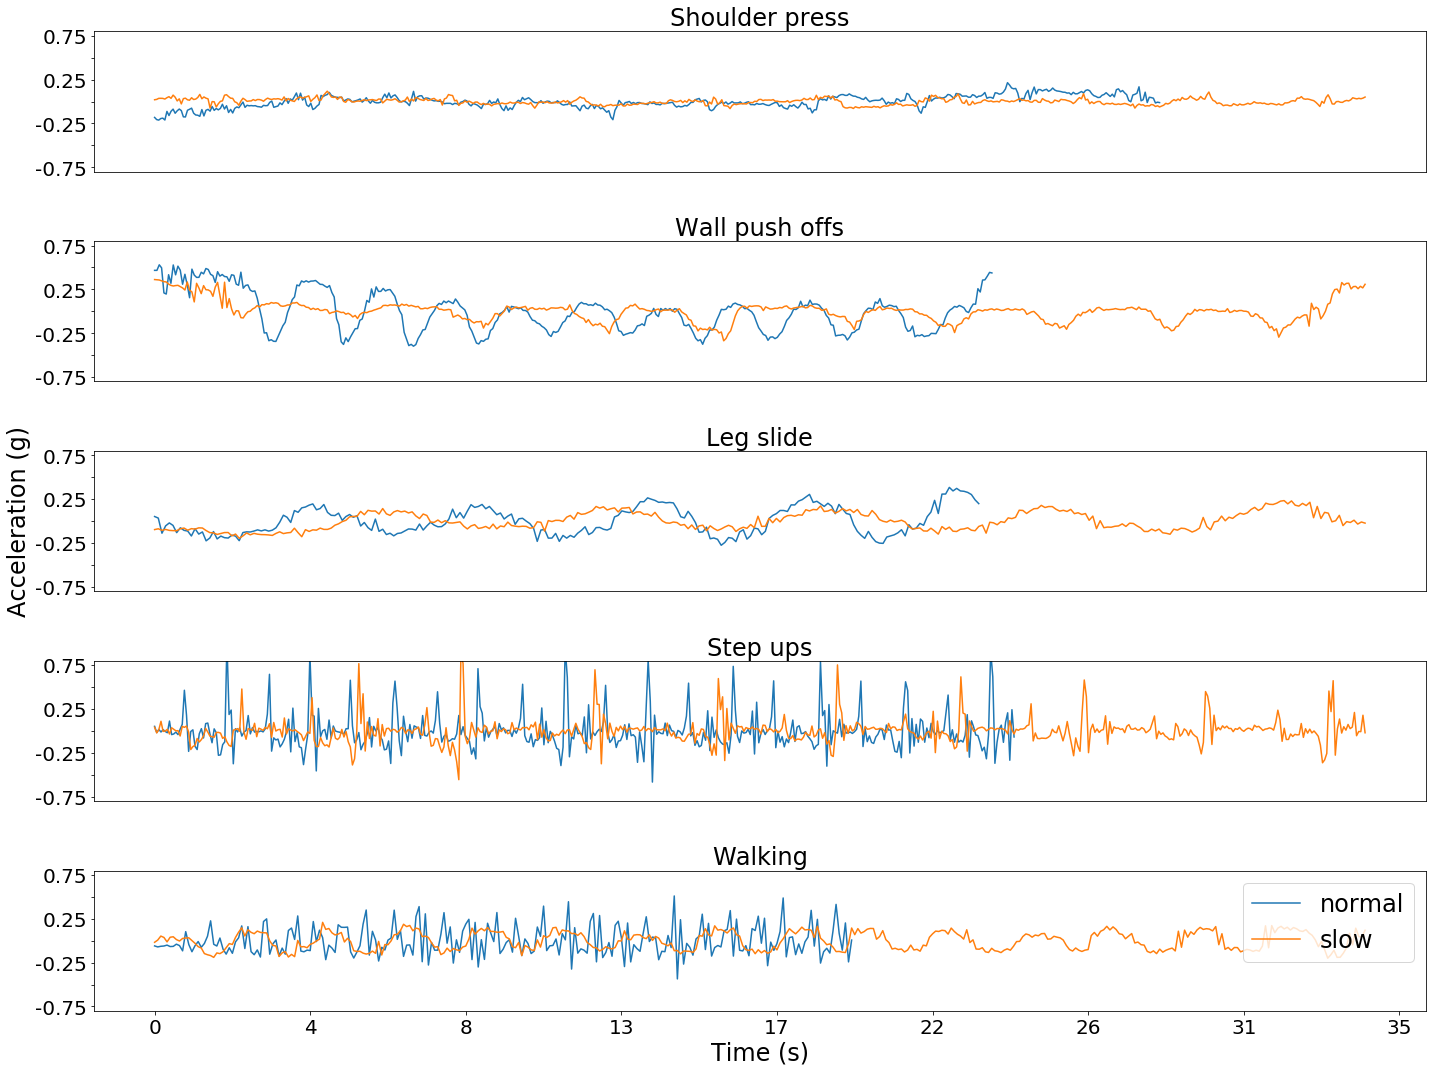

In [320]:
plot_activities_comparison_both(subject='teo', activities=[5, 6, 7, 8, 9], ylim=(-0.8,0.8), save=True, title="last_5")

In [14]:
data = read_all_files()

100%|██████████| 306/306 [00:23<00:00, 13.28it/s]
